Report

## Methods and Results:

According to the article written by Khan et.al, the most important features in classifying the class of the dry bean were the following: ShapeFactor2, ShapeFactor1, Minor Axis Length, EquivDiameter, Roundness and ConvexArea (2023). Therefore, we narrowed down our predictors to these 6 variables. 

Initially, we wanted to use the variables ShapeFactor2 and ShapeFactor1 as our two predictors. There are a total of 4 shape factors (shape forms) in the entire dataset; each shape would be significant enough to be placed into different groups. Because of this significance, plotting two different shape factors would intuitively make sense. An analogy would be comparing the shapes of a triangle and a circle - two very different shapes would allow for a clearer identification of class. However, we were unable to obtain the scale in which these two variables were being measured. Due to this lack of information, we decided to eliminate these two variables from our possible choices of predictors. 

To narrow it down even further we experimentally plotted the other 4 most significant  variables against each other in various scatter plots. Looking at these 6 plots made from the training data, the scatter plot produced from roundness and minor axis length showed the most distinct difference between the 7 classes when using the colour function. This is ideal because it allows for easier differentiation between classes. The plots “Comparing Convex Area & Roundness" and “Comparing Equivalent Diameter & Roundness” also show good differentiation between classes but there is more overlap in the classes Barbunya, Cali, and Horoz. Therefore, we concluded to use roundness and minor axis length as our two predictors to avoid using 3D models.

The plot “Comparing Minor Axis Length & Roundness” shows the relationship between minor axis length and roundness, allowing the visualization of how different classes of beans have different measurements when taking in these two features together. This allows them to be distinctly classified by 7 different colours. We can see from the legend titled “Bean Class” that each bean type is classified by a specific colour. Thus, we can easily identify a bean into their respective category/type based on colour. 

In addition to the plot, we wanted to see how many observations were in each class. This would aid to the complete visualization of the plot  “Comparing Minor Axis Length & Roundness” as it is difficult to see how many points there truly are due to overlap of same coloured points. We used only the training data to do so, using the functions group_by() and summarize().

Once we decided that minor axis length and roundness were the best predictors, we began by creating a model that would help us choose the optimal number of k neighbors to obtain the highest accuracy when predicting a dry bean with an unknown class. 

First, we created a nearest neighbor model specification with engine "kknn" and mode “classification”. Because we do not know the best k value in order to produce the most accurate results, we will have to do a series of steps to figure out the optimal k value. To do so, we set our number of neighbors to “tune.”

Next, we simplified our training data set to contain only the necessary variables/ predictors (minor axis length,  roundness, and class). Then, we created a recipe where minor axis length and roundness will be used to predict the class of the dry bean, and scaled and centered the two predictors. 

To determine our optimal k value, we need to use cross validation. First, we created a tibble to specify the k values we want to test. As this data set is very big, we were unavailable to test a large range of k values due to limits in computational power. Therefore, we opted to test the k values: 2-12.  We then created a dataframe with 6 folds with the training data, setting strata to “Class” in order to ensure randomization. These were combined in a workflow, and the different k values were graphed against their respective accuracies (“Accuracies of k values”). Based on this we decided the best k value to use was 9. Although the higher k values showed a higher accuracy value, too much computational power was involved such that using bigger values of k slowed our classification model significantly. As the k value 9 generally provides a similar  accuracy to the higher k values, we decided that this value was the best for our model. 

Finally, we refitted our model using 9 neighbors and assessed the accuracy of our classifier against our testing set. We set our engine to “kknn” and mode to “classification” and  created a testing dataset with the variables MinorAxisLength, roundness, and Class. Then, we created the classifier through a workflow by combining the recipe we previously created and the model specification with k = 9. Finally, we tested the accuracy of our classifier by predicting the testing dataset and computing the accuracy. Our final accuracy result was 85.31%. An increased accuracy value may be achieved using a higher k value; however, this once again requires too much computational power. 


In [ ]:
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
library(readxl)
library(gridExtra)
library(RColorBrewer)
require(gridExtra)
options(repr.matrix.max..rows = 6)
set.seed(99999)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [8]:
url <- "https://github.com/Adrianna-Nimmons/dsci-100-project-group51/raw/main/beans.xlsx"
download.file(url, "beans.xlsx")
beans_data <- read_excel("beans.xlsx")
beans_data <- mutate(beans_data, Class = as_factor(Class))

# split data into two sets: 75% training and 25% testing
beans_split <- initial_split(beans_data, prop = 0.75, strata = Class)
beans_training <- training(beans_split)
beans_testing <- testing(beans_split) 
new_table_1<- beans_training |>
            group_by(Class)|>
             summarize(Mean_Minor_Axis_Length = mean(MinorAxisLength), Mean_Roundness = mean(roundness), count=n())
new_table_1


Class,Mean_Minor_Axis_Length,Mean_Roundness,count
<fct>,<dbl>,<dbl>,<int>
SEKER,201.9546,0.9447044,1520
BARBUNYA,240.4264,0.8012018,1006
BOMBAY,374.4868,0.8651978,394
CALI,236.5123,0.8460325,1216
HOROZ,183.9087,0.7937921,1458
SIRA,191.0144,0.8844702,1962
DERMASON,165.4859,0.9080529,2650


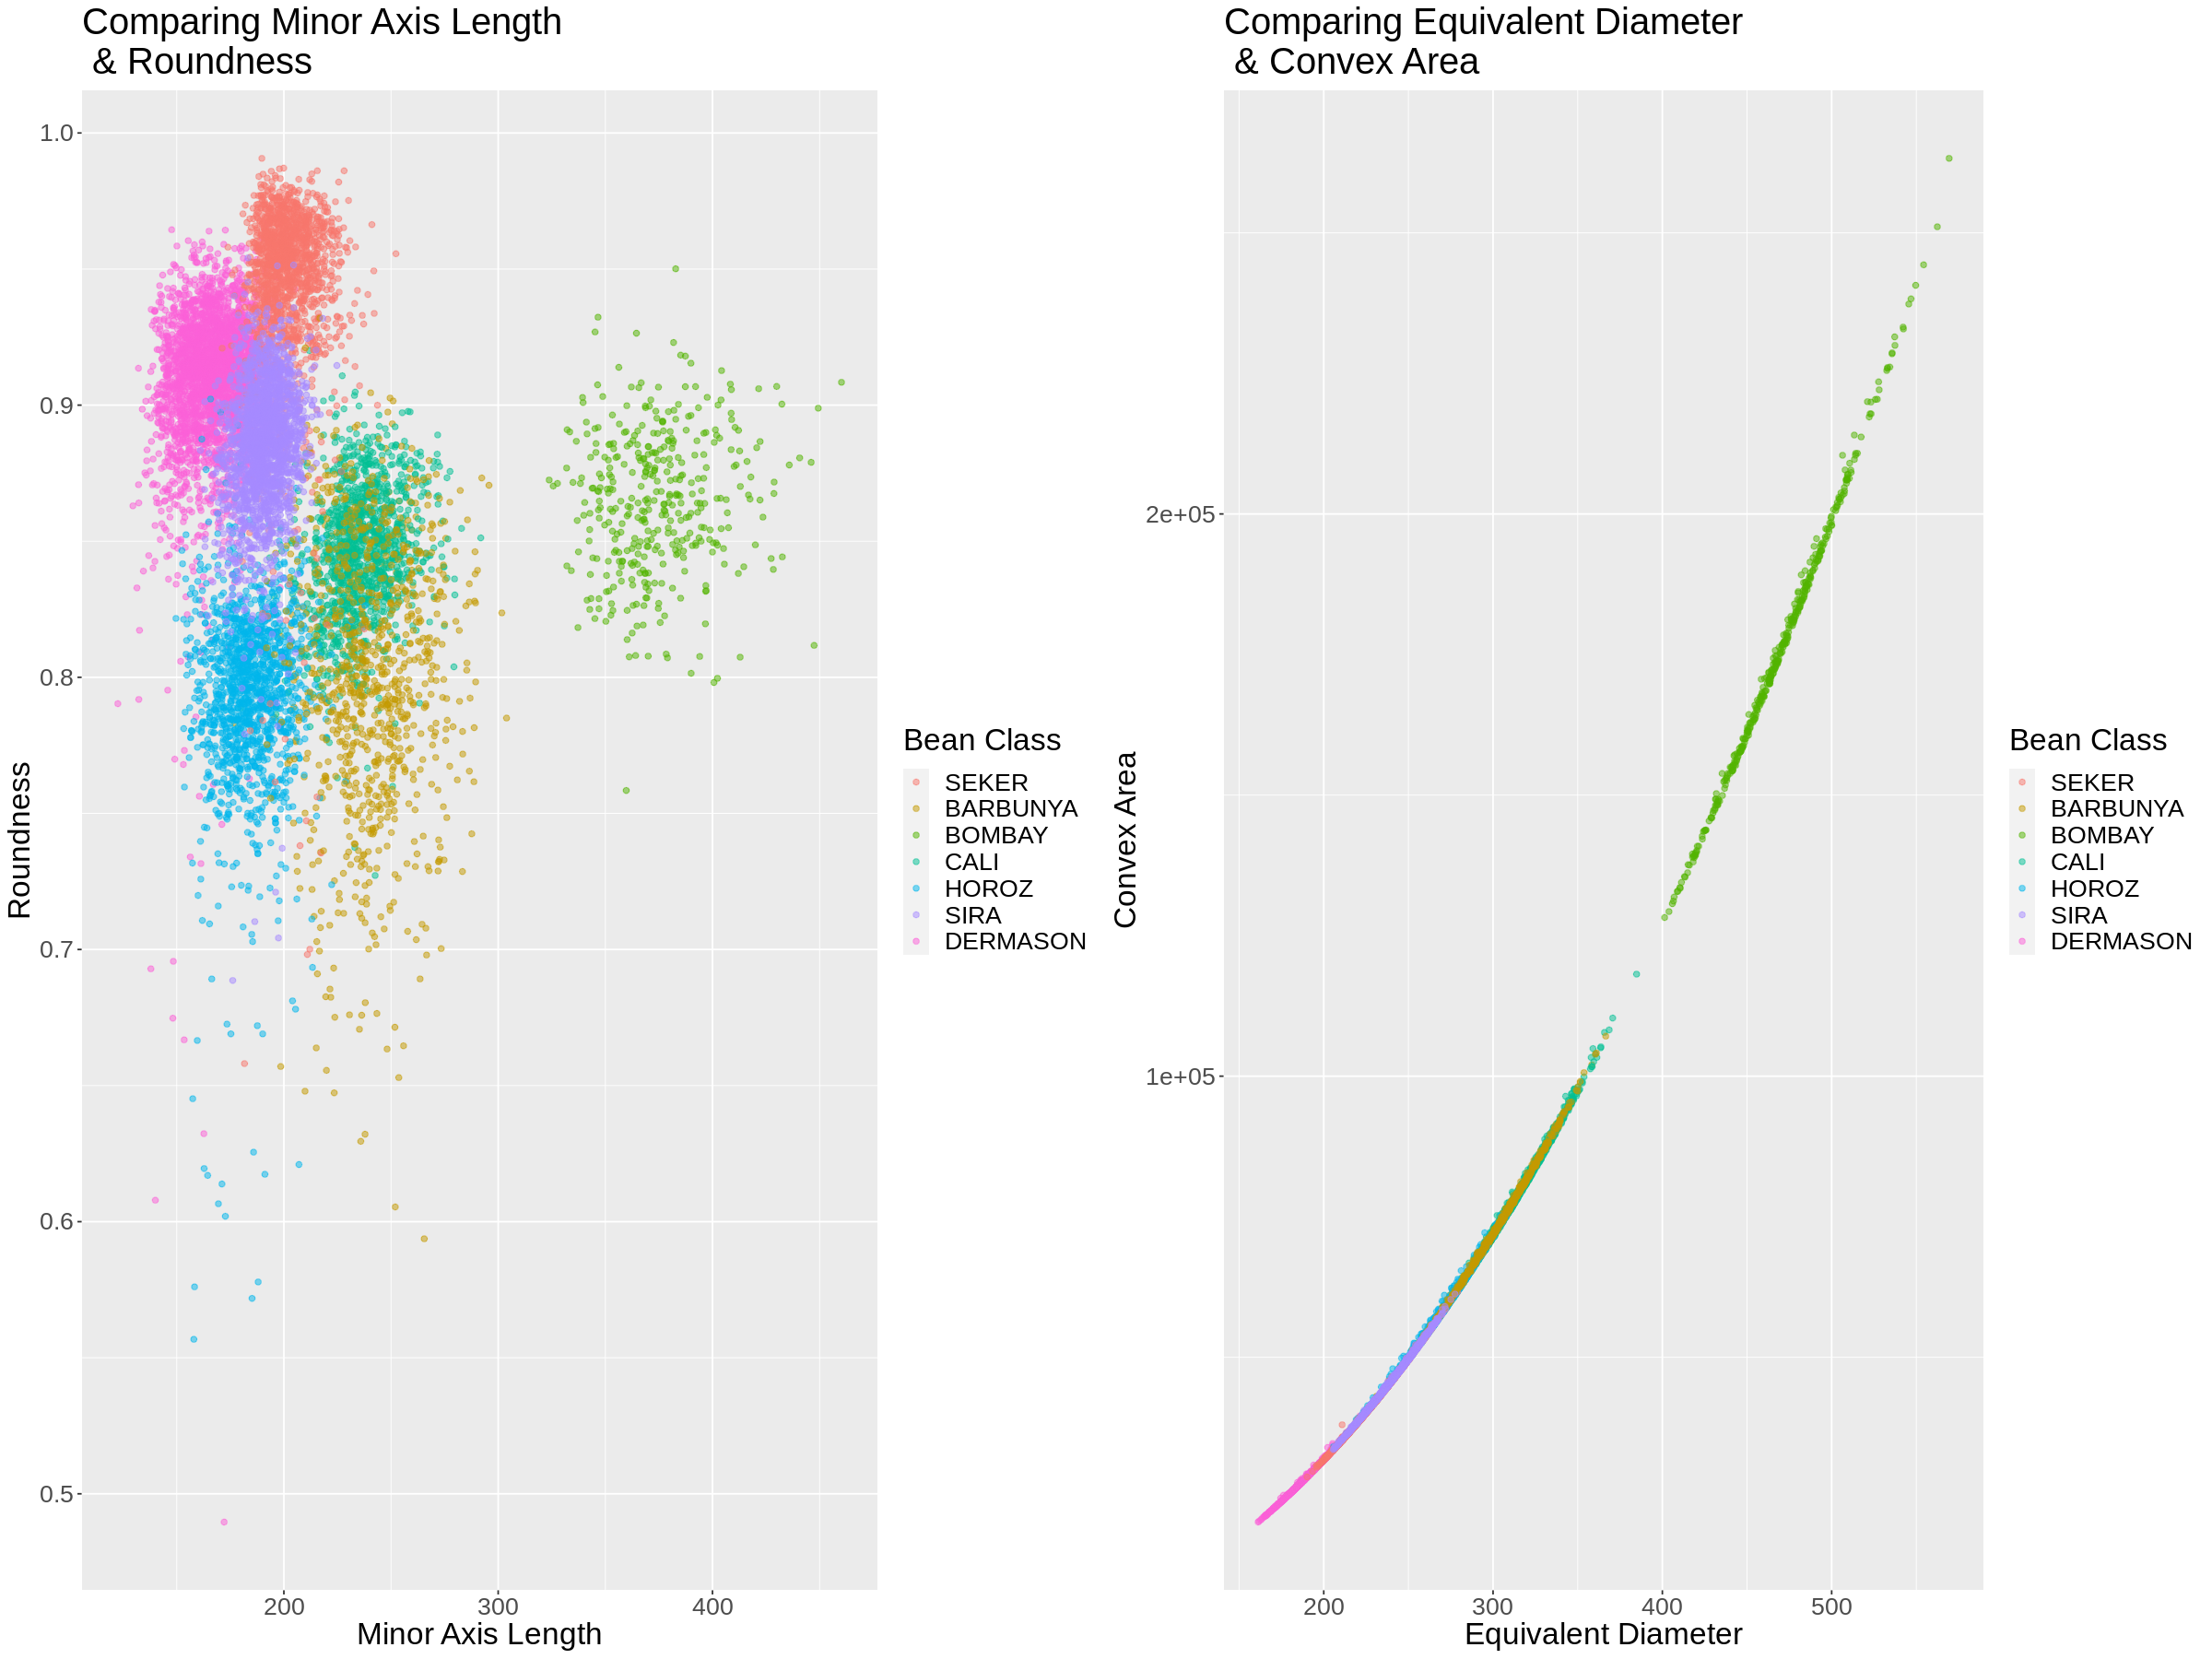

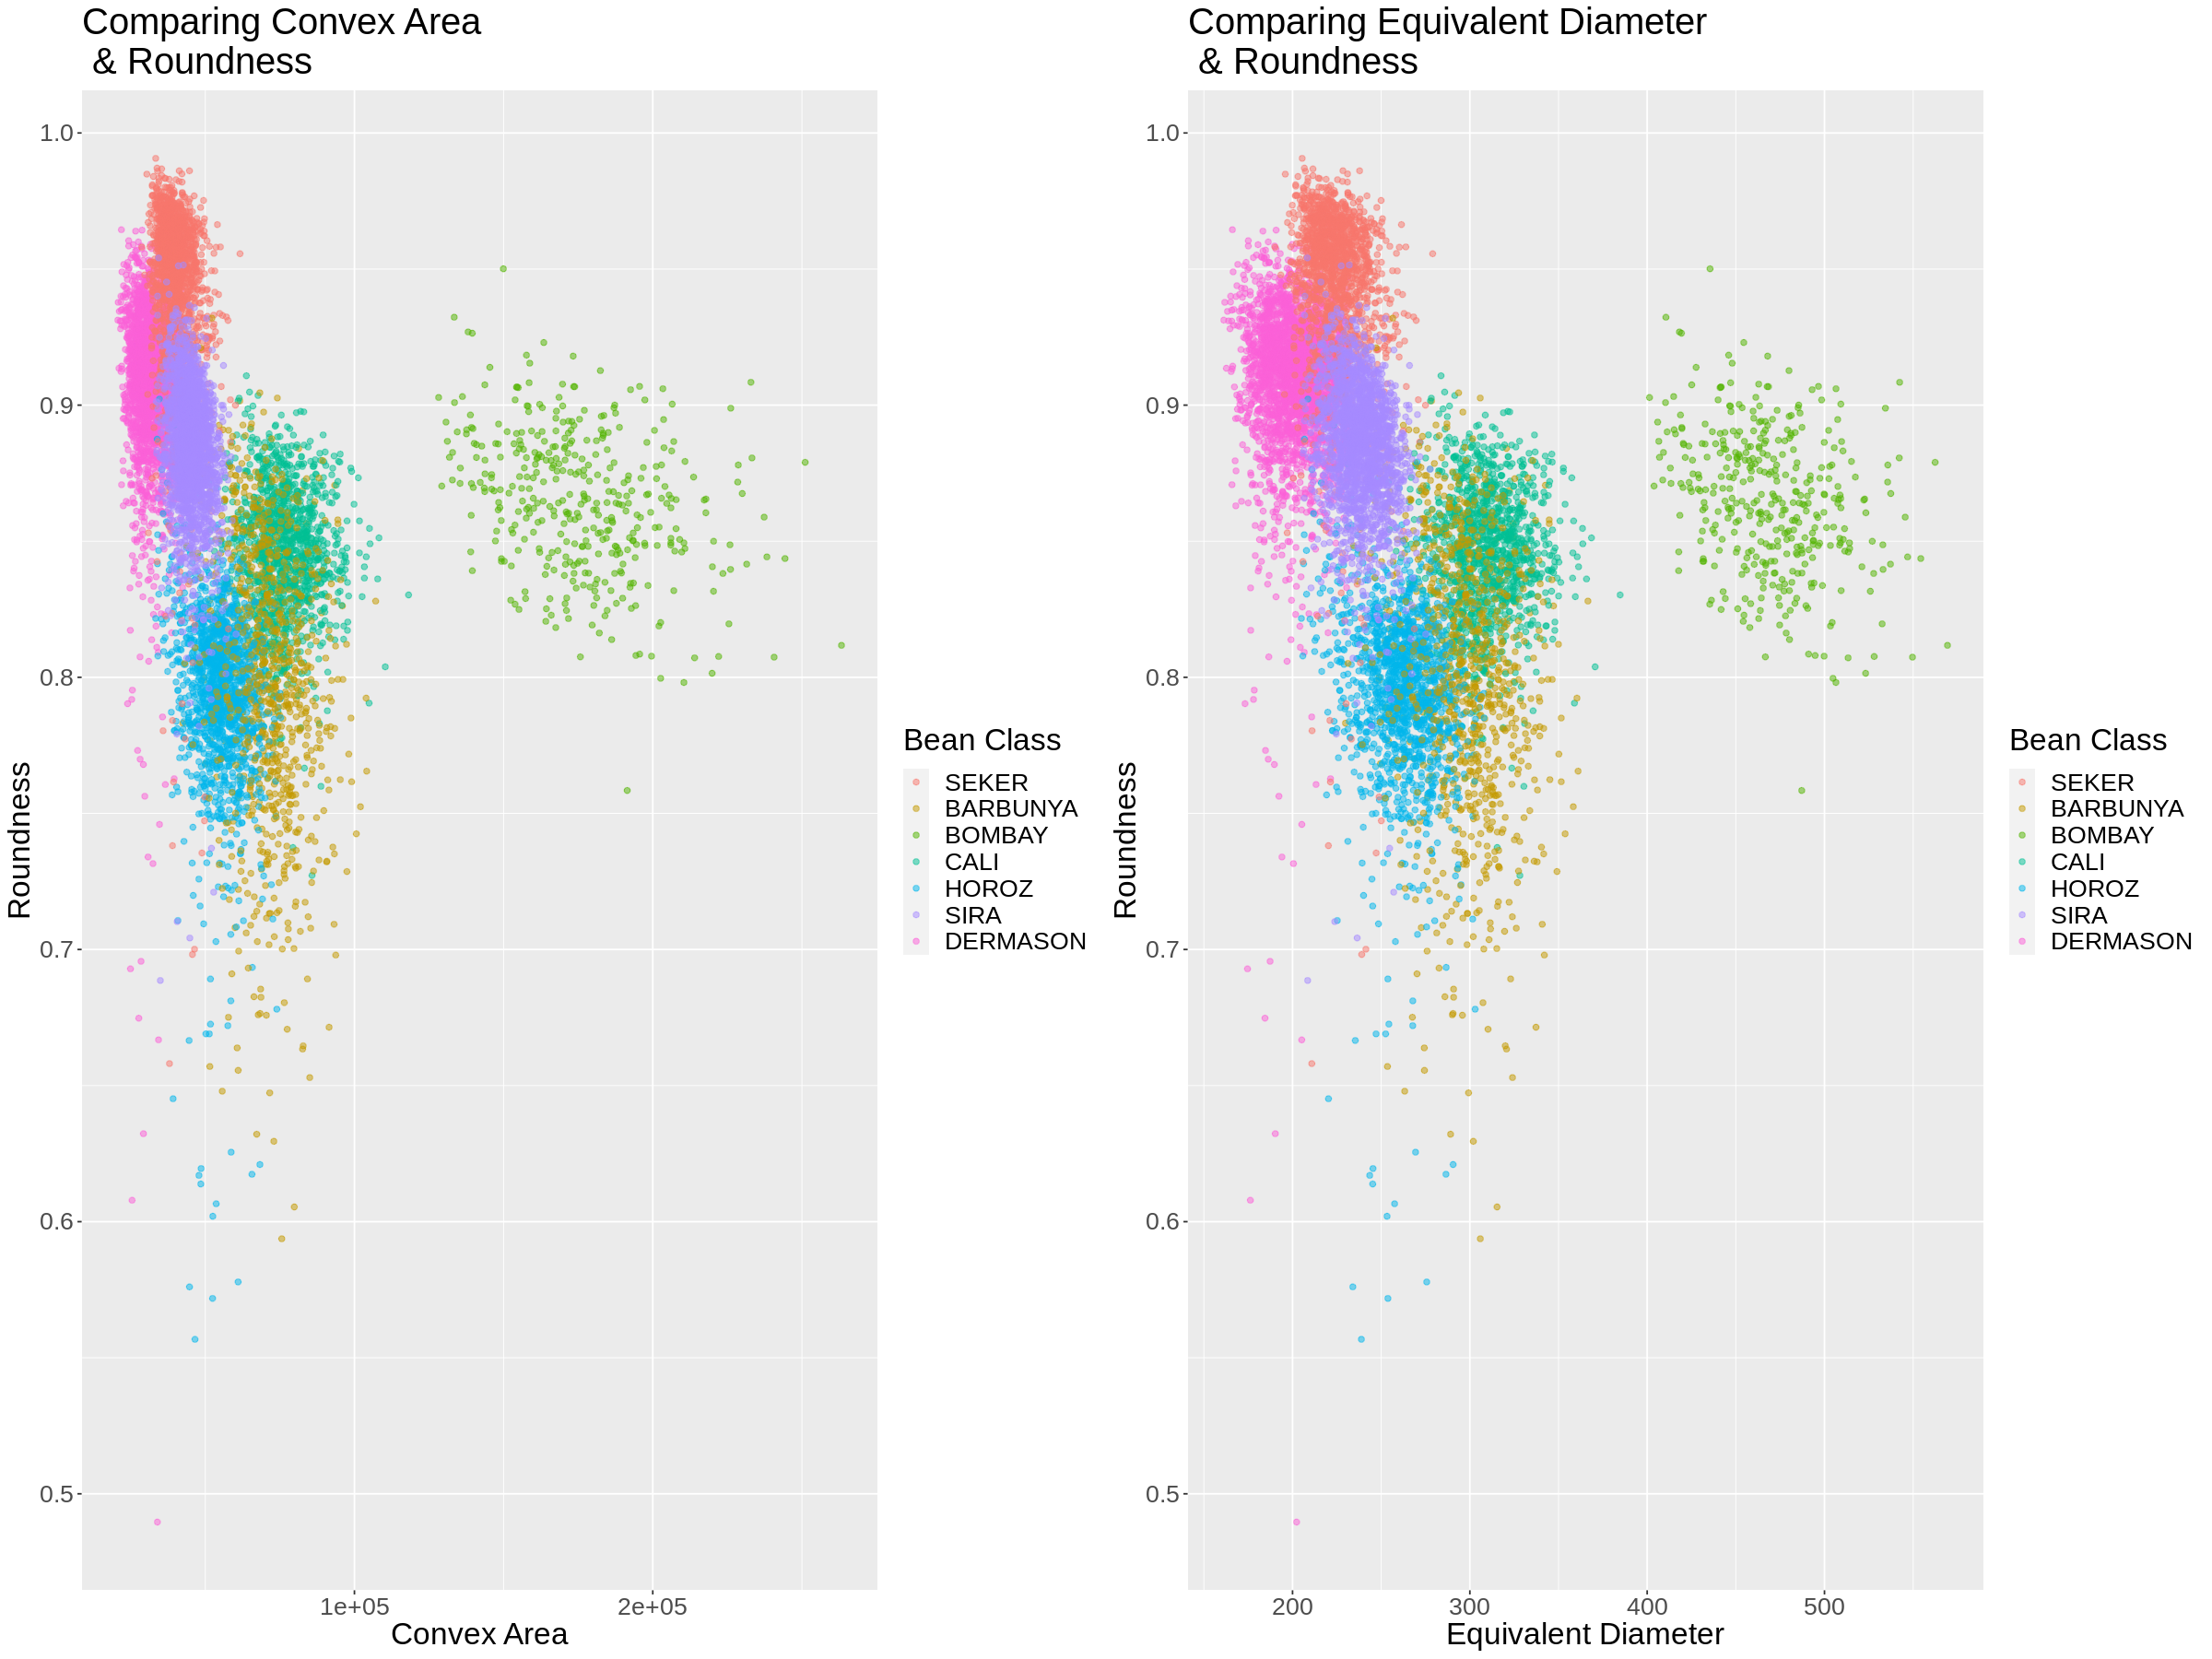

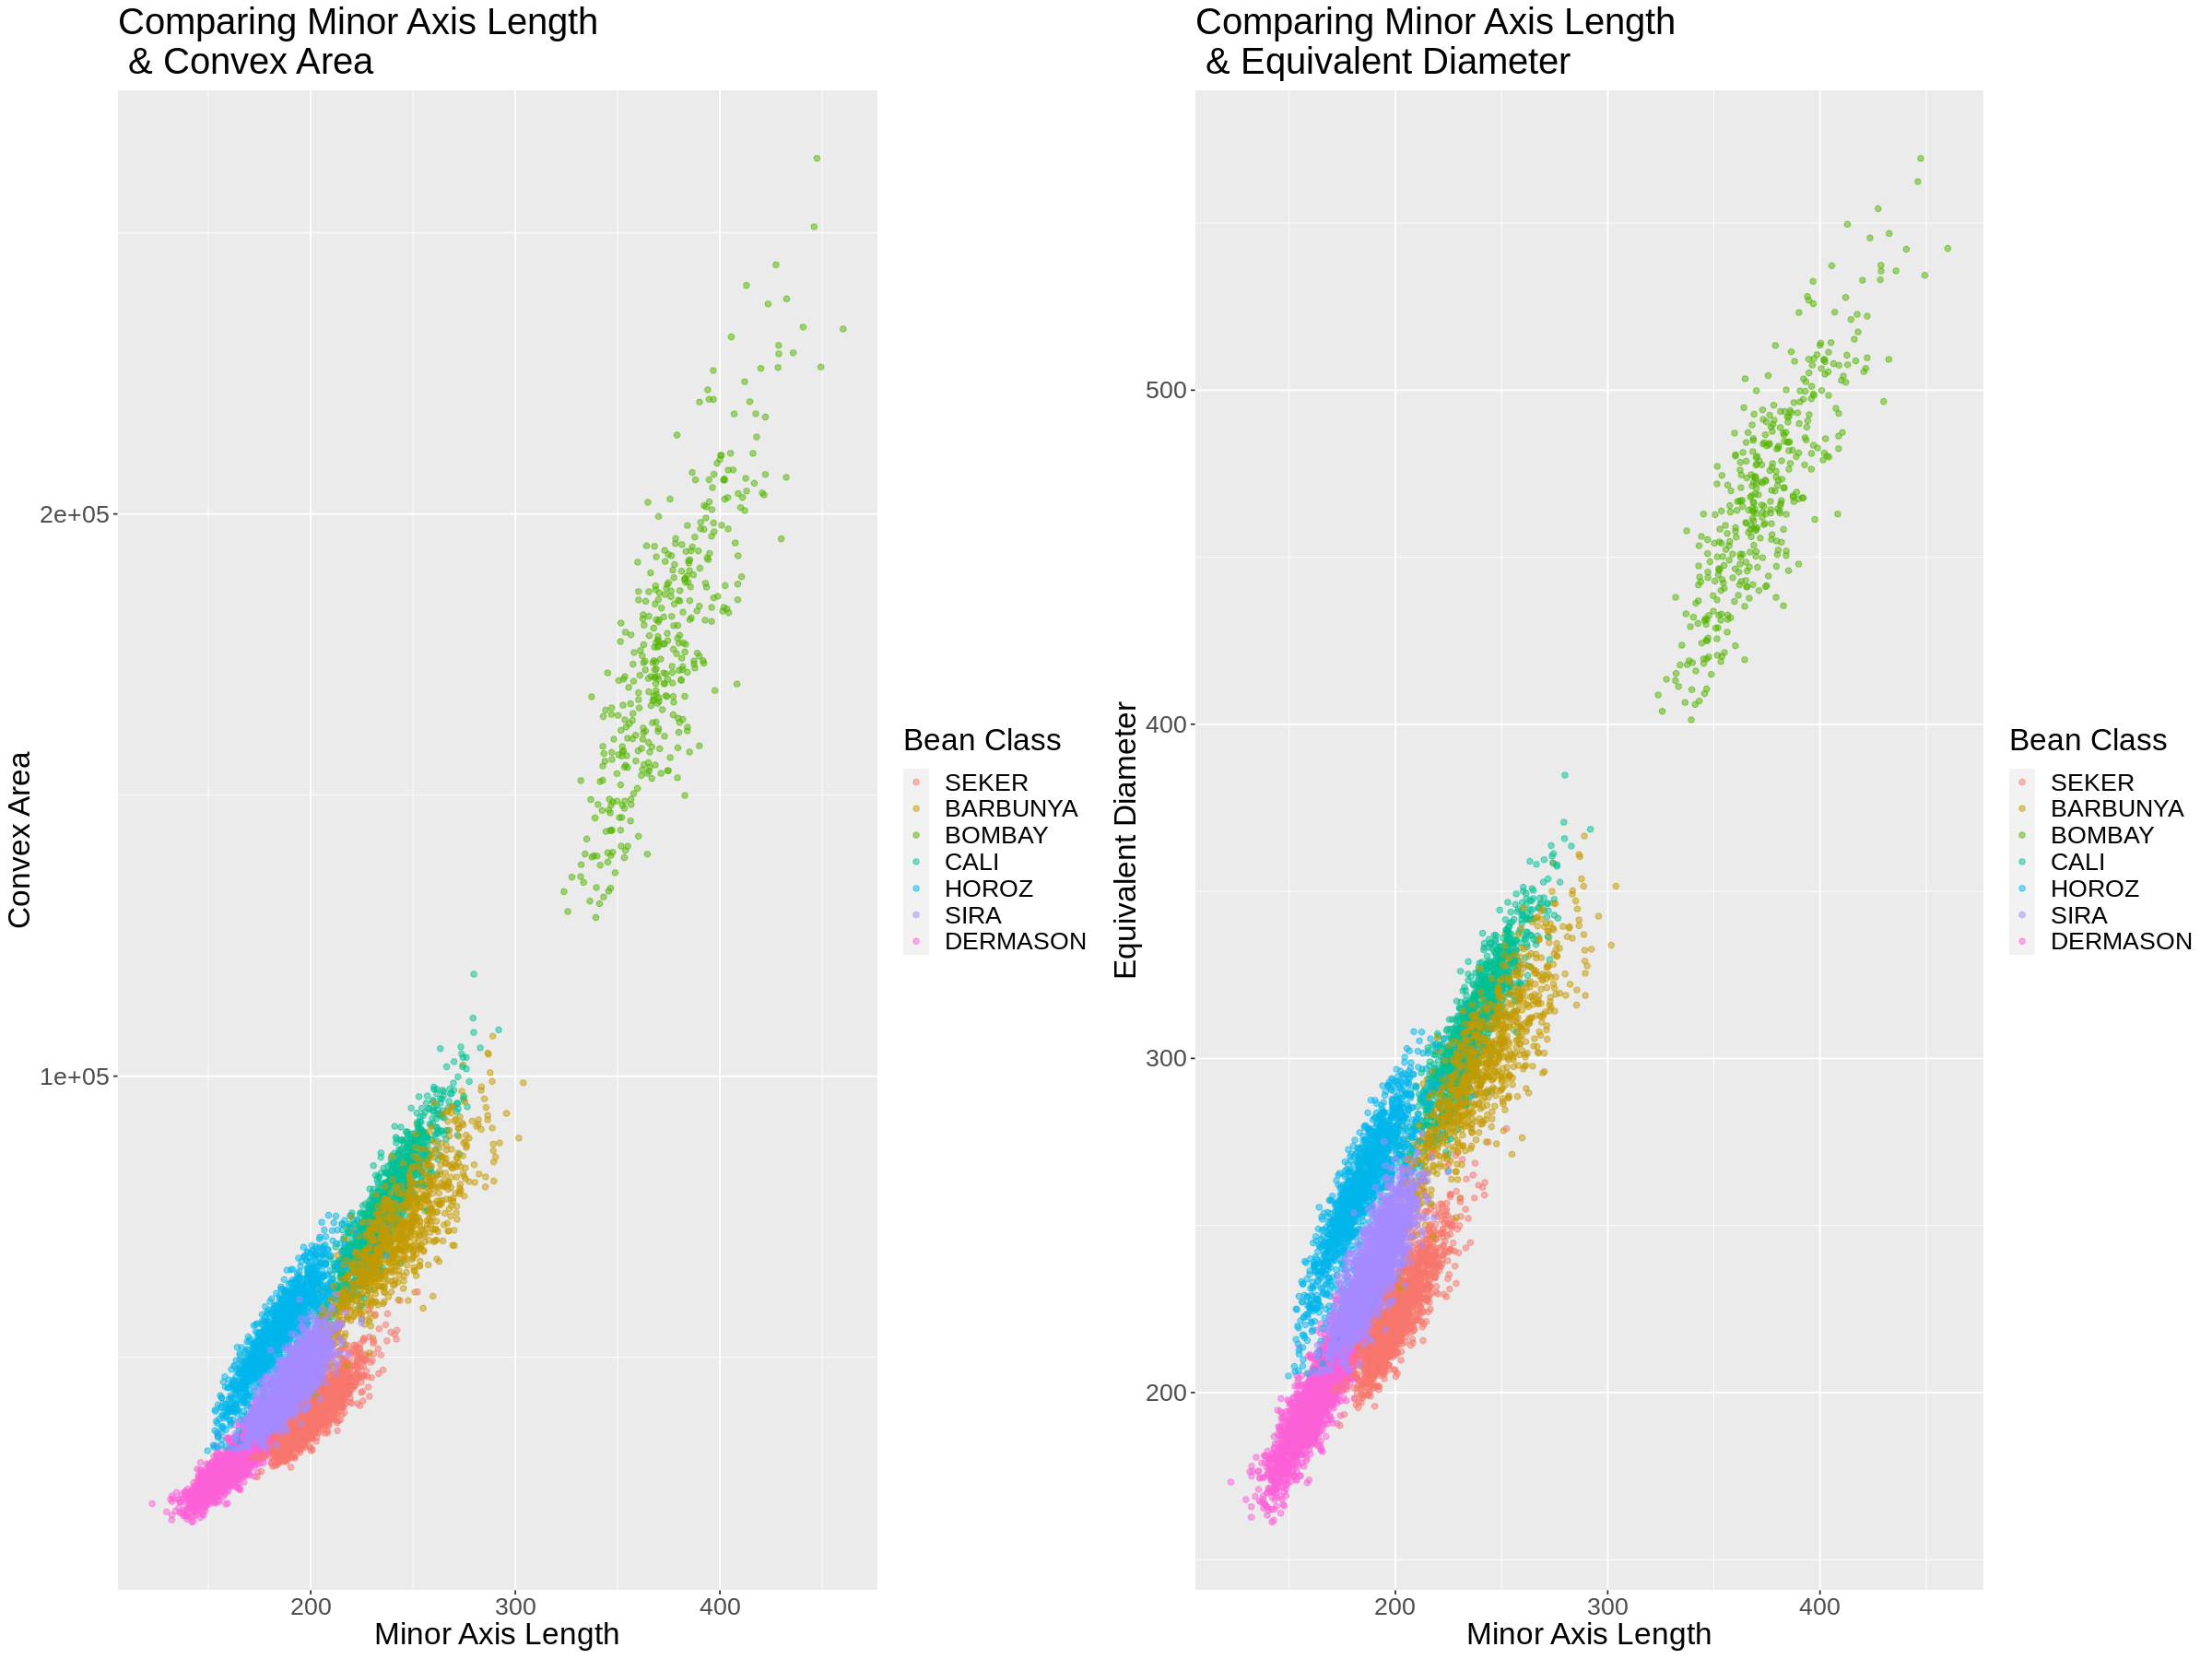

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 15)

# graphing two sets of variables together to see which pair the classes are the most distinct
beans_shape_factor_plot1 <- ggplot(beans_training, aes(x = MinorAxisLength, y = roundness, color = Class))+
geom_point(alpha = 0.5) +
labs( x = "Minor Axis Length", y = "Roundness", color = "Bean Class")+
ggtitle("Comparing Minor Axis Length \n & Roundness") +
theme(text = element_text(size = 20))+
scale_fill_brewer(palette = "Set1") 

beans_shape_factor_plot2 <- ggplot(beans_training, aes(x = EquivDiameter, y = ConvexArea, color = Class))+
geom_point(alpha = 0.5) +
labs( x = "Equivalent Diameter", y = "Convex Area", color = "Bean Class")+
ggtitle("Comparing Equivalent Diameter \n & Convex Area") +
theme(text = element_text(size = 20))+
scale_fill_brewer(palette = "Set1") 

beans_shape_factor_plot3 <- ggplot(beans_training, aes(x = ConvexArea, y = roundness, color = Class))+
geom_point(alpha = 0.5) +
labs( x = "Convex Area", y = "Roundness", color = "Bean Class")+
ggtitle("Comparing Convex Area \n & Roundness") +
theme(text = element_text(size = 20))+
scale_fill_brewer(palette = "Set1")

beans_shape_factor_plot4 <- ggplot(beans_training, aes(x = EquivDiameter, y = roundness, color = Class))+
geom_point(alpha = 0.5) +
labs( x = "Equivalent Diameter", y = "Roundness", color = "Bean Class")+
ggtitle("Comparing Equivalent Diameter \n & Roundness") +
theme(text = element_text(size = 20))+
scale_fill_brewer(palette = "Set1")


beans_shape_factor_plot5 <- ggplot(beans_training, aes(x = MinorAxisLength, y = ConvexArea, color = Class))+
geom_point(alpha = 0.5) +
labs( x = "Minor Axis Length", y = "Convex Area", color = "Bean Class")+
ggtitle("Comparing Minor Axis Length \n & Convex Area") +
theme(text = element_text(size = 20))+
scale_fill_brewer(palette = "Set1")


beans_shape_factor_plot6 <- ggplot(beans_training, aes(x = MinorAxisLength, y = EquivDiameter, color = Class))+
geom_point(alpha = 0.5) +
labs( x = "Minor Axis Length", y = "Equivalent Diameter", color = "Bean Class")+
ggtitle("Comparing Minor Axis Length \n & Equivalent Diameter") +
theme(text = element_text(size = 20))+
scale_fill_brewer(palette = "Set1")



grid.arrange(beans_shape_factor_plot1, beans_shape_factor_plot2, nrow = 1) 

grid.arrange(beans_shape_factor_plot3, beans_shape_factor_plot4, nrow = 1)

grid.arrange(beans_shape_factor_plot5, beans_shape_factor_plot6, nrow = 1)

In [ ]:
set.seed(99999)
# creating an engine for cross-validation (to choose the k value)

# creating a nearest neighbor model specification with engine "kknn" for classification
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors = tune() ) |>
        set_engine("kknn") |>
        set_mode("classification")

# creating a training dataset with the variables MinorAxisLength, roundness, and Class
beans_training_variables <- beans_training |>
                            select(MinorAxisLength,roundness,Class)

# preparing a recipe with the training data (and scaling)
knn_recipe<- recipe(Class~., data=beans_training_variables) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

# specifiying the k values we want to test
kvals<-tibble(neighbors= seq(from = 2, to =12 , by= 1))

# creating a dataframe with 6 folds with the training data
beans_vfold <- vfold_cv(beans_training_variables, v=6 , strata=Class)

# performing cross-validation by combining recipe and model specification
knn_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = beans_vfold, grid = kvals) |>
  collect_metrics() 

# determine the accuracy of the model
accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.8035466,6,0.002253282,Preprocessor1_Model01
3,accuracy,multiclass,0.8366646,6,0.003066008,Preprocessor1_Model02
4,accuracy,multiclass,0.8404847,6,0.002715891,Preprocessor1_Model03
5,accuracy,multiclass,0.8487179,6,0.002484914,Preprocessor1_Model04
6,accuracy,multiclass,0.8501876,6,0.003105757,Preprocessor1_Model05
7,accuracy,multiclass,0.8526372,6,0.002431829,Preprocessor1_Model06
8,accuracy,multiclass,0.8540094,6,0.003180061,Preprocessor1_Model07
9,accuracy,multiclass,0.8580276,6,0.003533607,Preprocessor1_Model08
10,accuracy,multiclass,0.8589089,6,0.003130747,Preprocessor1_Model09


In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# plotting the accuracies of various k values to determine which one to use
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

In [ ]:
# creating the engine with optimal k value (9) that was found through the previous plot
# chose the k that follows the greatest increase (the increase from 8 to 9) that will also give us the highest accuracy)

k <- 9
beans_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k ) |>
        set_engine("kknn") |>
        set_mode("classification")

# creating a testing dataset with the variables MinorAxisLength, roundness, and Class
beans_testing_variables <- beans_testing |>
                            select(MinorAxisLength,roundness,Class)

# creating the classifier through a workflow by combining the recipe and model specification
beans_fit <- workflow()|>
            add_recipe(knn_recipe) |>
            add_model(beans_spec) |>
            fit(data = beans_training_variables)

# predicting labels for the testing set with the classifier (k = 9) and binding the columns
beans_predict <- predict(beans_fit, beans_testing_variables) |>
                bind_cols(beans_testing_variables)
head(beans_predict)      


In [ ]:
# testing the accuracy of the classifer 
accuracy<- beans_predict |>
            metrics(truth=Class, estimate=.pred_class)
accuracy
conf <- beans_predict |>
        conf_mat(truth=Class, estimate=.pred_class)
conf

<<<<<<< LOCAL CELL DELETED >>>>>>>
## Discussion:

We expected that the difference in variables obtained from the images would be significant enough such that classification between different types of bean class would be possible and accurate. Therefore, classification of an unknown bean should be possible using our finished produced model.

When analysing the results from our classifier, it predicted the testing set with an accuracy of 85%, ultimately this is a high accuracy and suitable to classify an unknown dry bean into one of the 7 dry bean classes. When compared to Khan’s previously mentioned study which received an accuracy of 93%, our classifier has a lower accuracy. This difference may be due to the fact that an XGB classifier was used as opposed to kknn. They also used a different number of predictors, they used 6 or more classifiers while we used 2. Our classification model could possibly be improved by using more predictors, however more predictors does not always lead to a more accurate classifier. 

These findings may be useful for people who work in agriculture and food manufacturing/quality assurance companies who work with beans. Making sure that the beans are consistent in shape is essential for food quality assurance practices in obtaining quality products. Moreover, with computer imagery, inspection of beans would require less human labour and error. Manually categorizing beans by hand can also be challenging and time consuming.
